***
# Task 1: Square root of 2 
***
***Author*** - *Connor Brookfield (g00361129@gmit.ie)*

This is my solution to the 1st Task assignment: Create a function to calculate the square root of 2. 

We can calculate the Square Root of a number using Newton's method for iterative approximation [1]. 
To find the square root $z$ of a number $x$, by iterating using the equation below. 

$$ z = z - \frac{z^2 - x}{2z}$$

In [1]:
def sqrt2():
    '''
    Function to calculate the square root of 2
    '''
    # Initial Square Root guess
    X = 2
    z = X / 2
    
    # Iterate to 100 decimal places
    while abs(X - (z * z)) > 0.000001:
        z -= (z*z - X) / (2 * z)
    # Return the Approximate Square Root 
    return print("%.100f" % z)

In [2]:
sqrt2()

1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000


***
# Task 2: Chi Squared Test
***
***Author*** - *Connor Brookfield (g00361129@gmit.ie)*

This is my solution to the 2nd Task assignment: Verify (*using scipy.stats*) 
the chi-squared value, and p-value of the table below, so that it matches ***Chi-squared value = 24.6***; 

|                | A | B | C | D | Total |
| :------------- | :----------: | :-----------: | :-------------: | :----------: | :-----------: |
|  White Collar  | 90 | 60 | 104 | 95 | 349 |
|  Blue Collar   | 30 | 50 | 51 | 20 | 151 |
|  No Collar     | 30 | 40 | 45 | 35 | 150 |
|      **Total** | **150** | **150** | **200** | **150** | **650** |
                       
                                                       Figure 1: [2]


In [17]:
from scipy.stats import chi2_contingency
chiSquaredValue, pValue, dof, expectedFreqs = chi2_contingency([[90,60,104,95],[30,50,51,20],[30,40,45,35]])

print("Chi Squared value = ", chiSquaredValue)
print("P value = ", pValue)
print("Expected Table Frequencies = ", expectedFreqs)

Chi Squared value =  24.5712028585826
P value =  0.0004098425861096696
Expected Table Frequencies =  [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


## Evaluation of the above code
In the code cell above, I used the ```chi2_contingency``` function from *scipt.stats*, and input the table data as a 2D array, to calculate the Chi Squared value (***24.5712028585826***), the P value (***0.0004098425861096696***) and the expected frequencies of the table.

The table of expected frequencies, is calculated using the total from a row, dividing it by the overall total of people, and multiplying it by the total of its relative collumn. 

## Example
To get the expected frequency of the value of 90 (```row = "White Collar", collumn = "A"```), we must;
    1. Get the Total value of the White Collar row from the table which is 349.
    2. Get the Total value of all the rows, which is 650.
    3. Divide the White Collar Total by the Total value of rows: 349/650
    4. Multiply the value from Step 3 by the total value of the collumn "A" which is 150: 349/650 * 150 = 80.53846154
    
## Conclusion
To conclude this task, I would like to point out that the values from the Python script, and the value given from the Task Assignment document are the same.

***
# Task 3: Standard Deviation: The difference between the STDEV.S and STDEV.P functions in Excel
***
***Author*** - *Connor Brookfield (g00361129@gmit.ie)*

This is my solution to the 3rd Task assignment: 
*Outline the differences between the excel functions; STDEV.S and STDEV.P. Demonstrate that the function STDEV.S provides a better estimate calculation for the standard deviation of a population when performed on a sample.*

## STDEV.S vs STDEV.P
STDEV.S is the excel function for getting the Standard deviation using a sample (subset) of a population, while STDEV.P is the function used for getting the Standard deviation using the whole population [3].

Using the sample standard deviation formula to get the standard deviation of a population is different to using the population standard deviation formula  because it uses Bessel's correction to correct the bias when estimating the population variance [4].

In [16]:
import numpy as np

#Variables + Data
population = [3,1,24,56,34,32,6,12,43,2]
sample = [3,1,34,6,43,2]

#STDEV.S, using a sample of the population data
stdevS = np.sqrt(np.sum((sample - np.mean(sample)) ** 2)/(len(sample)-1))
#STDEV.P, using a sample of the population data
stdevP = np.sqrt(np.sum((sample - np.mean(sample)) ** 2)/len(sample))
#Numpy standard deviation using all the population data
numpyStd =np.std(population)

#Outputting results
print("STDEV.S (using sample) = %f" % stdevS)
print("STDEV.P (using sample) = %f" % stdevP)
print("Numpy (using population) = %f" % numpyStd)

STDEV.S (using sample) = 18.627041
STDEV.P (using sample) = 17.004084
Numpy (using population) = 18.433936


## Evaluation
As we can see from the above code, using the sample standard deviation formula provides a better estimate for the standard deviation when performed on a sample rather than the population standard deviation formula using sample data. This proves that Bessel's correction/bias shift makes the formula for calculating the standard deviation of a sample more accurate than the standard deviation of a population for a sample.

***
# Task 4: Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set
***
***Author*** - *Connor Brookfield (g00361129@gmit.ie)*

This is my solution to the 3rd Task assignment: 
*Use ```scikit-learn``` to apply k-means clustering to Fisher’s famous Iris data set.  You will easily obtain a copy of the dataset online.  Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.*

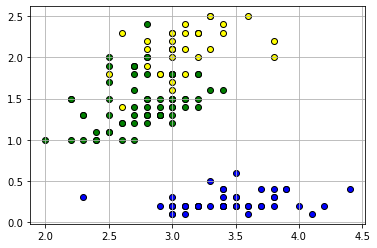

In [66]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

#Load the iris dataset and set an instance variable 
iris = load_iris()
dataset = iris.data

# Create a K-Means instance
kmclusters = KMeans(n_clusters=3, random_state=0)

# Make predictions on and fit the dataset (compute cluster centers, and predict cluster index for each sample)
y_kmcluster = kmclusters.fit_predict(dataset)

# Plot the K-means clusters in a scatter plot
plt.scatter(dataset[y_kmcluster == 0, 1], dataset[y_kmcluster == 0, 3], 
            c='yellow', edgecolor='black', label='Yellow cluster')

plt.scatter(dataset[y_kmcluster == 1, 1], dataset[y_kmcluster == 1, 3], 
            c='blue', edgecolor='black', label='Blue cluster')

plt.scatter(dataset[y_kmcluster == 2, 1], dataset[y_kmcluster == 2, 3], 
            c='green', edgecolor='black', label='Green cluster')

# Show the scatterpoints with a grid
plt.grid()
plt.show()


In [ ]:
***
# References

[1] Algorithms, Blockchain and Cloud; Newton Iterative Sqrt Method: https://helloacm.com/newton-iterative-sqrt-method/

[2] Chi-squared test; Example chi-squared test for categorical data: https://en.wikipedia.org/wiki/Chi-squared_test#Example_chi-squared_test_for_categorical_data

[3] What is the difference between population and sample?; Sample vs. population: https://www.statsandr.com/blog/what-is-the-difference-between-population-and-sample/

[4] Bessel's Correction; Wikipedia: https://en.wikipedia.org/wiki/Bessel%27s_correction

***